In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv("/content/HR_comma_sep.csv")

In [4]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


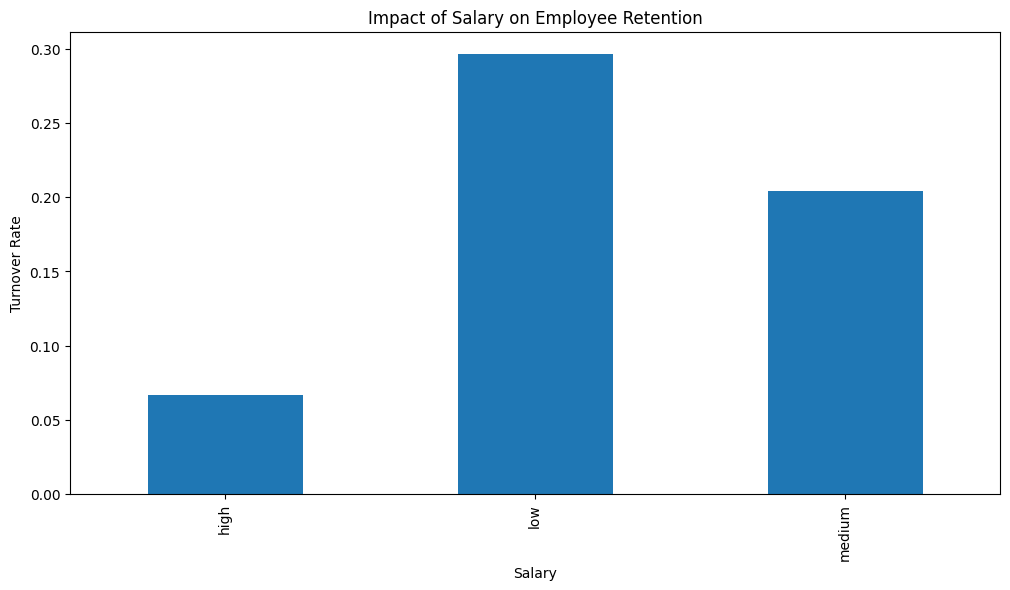

In [5]:
# Plot a bar chart showing the impact of employee salaries on retention
plt.figure(figsize=(12, 6))
df.groupby('salary')['left'].mean().plot(kind='bar')
plt.title('Impact of Salary on Employee Retention')
plt.xlabel('Salary')
plt.ylabel('Turnover Rate')
plt.show()

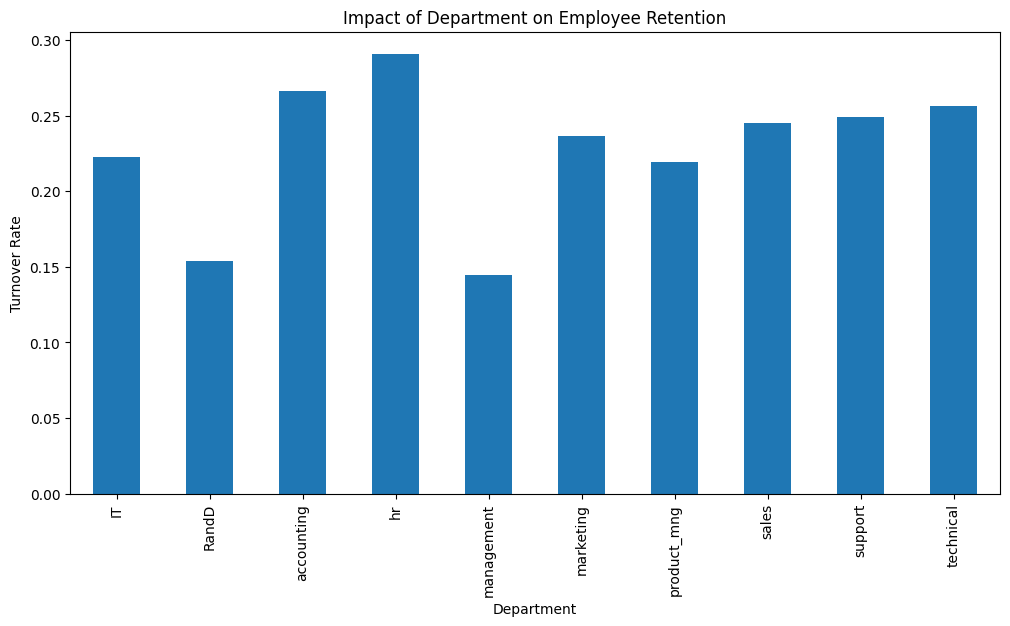

In [6]:
# Plot a bar chart showing the correlation between department and employee retention
plt.figure(figsize=(12, 6))
df.groupby('Department')['left'].mean().plot(kind='bar')
plt.title('Impact of Department on Employee Retention')
plt.xlabel('Department')
plt.ylabel('Turnover Rate')
plt.xticks(rotation=90)
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [13]:
# Assuming your DataFrame 'df' has the following columns:
# 'salary', 'Department', 'left' (target variable)

# Encode the categorical variables
le = LabelEncoder()
df['salary_encoded'] = le.fit_transform(df['salary'])
df['Department_encoded'] = le.fit_transform(df['Department'])

In [14]:
# Split the data into training and testing sets
X = df[['salary_encoded', 'Department_encoded']]
y = df['left']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
X_train

,salary_encoded,Department_encoded
9838,1,6
7689,0,9
6557,2,1
6872,2,2
820,1,9
...,...,...
5191,1,8
13418,2,7
5390,2,8
860,1,7


In [17]:
# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [18]:
# Evaluate the model's accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Model Accuracy: {accuracy:.2f}')

Logistic Regression Model Accuracy: 0.76


In [20]:
X_test

,salary_encoded,Department_encoded
6723,2,5
6473,1,0
4679,1,7
862,1,7
7286,1,3
...,...,...
3297,2,7
14113,2,7
5514,2,7
9939,2,7


In [21]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])